### **Script to Generate Figures for the Paper (SBLP)**
Using OJClone database

##### **Setup**

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

poj = pd.read_csv("./metrics/poj104_acc.csv", skipinitialspace=True)
poj = poj[poj["model"] != 'SGD']
poj = poj.replace(to_replace=r'#', value= '\\n', regex=True)

ojclone = pd.read_csv("./metrics/ojclone_acc.csv", skipinitialspace=True)
ojclone = ojclone[ojclone["model"] != 'SGD']
ojclone = ojclone.replace(to_replace=r'#', value= '\\n', regex=True)

In [2]:
figSize=(9,7)
width=4.5
height=5
legendSize=13
fontSizeTitle=14
barWidth=0.4
rot=45
ticksSize=14

In [29]:
def gerarGrafico(modelo, titulo, isBaseline=False, figToUse=None, axisToUse=None, save=True):
    base="ojclone"
    t=modelo
    df = ojclone[ojclone["type"] == t]

    if not figToUse and not axisToUse:
        fig, axs = plt.subplots(1,1,figsize=(width,height))
        axisToUse = axs
        figToUse = fig

    if not isBaseline:
        baseline = ojclone[ojclone["type"] == 'O0']
        axisToUse.bar(baseline['model'], baseline['accuracy'], color='k', alpha=0.5, label="Baseline", width=barWidth)

    axisToUse.bar(df['model'], df['accuracy'], width=barWidth, color='k', label=modelo)

    axisToUse.set_axisbelow(True)
    axisToUse.grid(axis='y')
    axisToUse.set_ylim([0,1])
    
    axisToUse.tick_params(axis='x', labelsize=ticksSize)
    axisToUse.tick_params(axis='y', labelsize=ticksSize)
    axisToUse.tick_params(axis='x', labelrotation = rot)

    if not isBaseline:
        axisToUse.legend(loc='upper right', ncol=1, prop={"size":legendSize})

    figToUse.set_facecolor("w")
    figToUse.suptitle(titulo, fontsize=fontSizeTitle, color='0.3')
    figToUse.supylabel("Acurácia")
    figToUse.tight_layout()
    if save:
        figToUse.savefig(f"pdfs/{base}_{t}.pdf", format="pdf", transparent=False)

##### **Game 0**

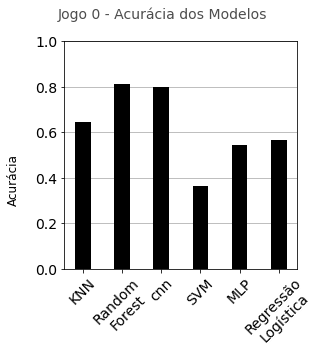

In [27]:
fig = gerarGrafico("O0", "Jogo 0 - Acurácia dos Modelos", True)

##### **Game 1**

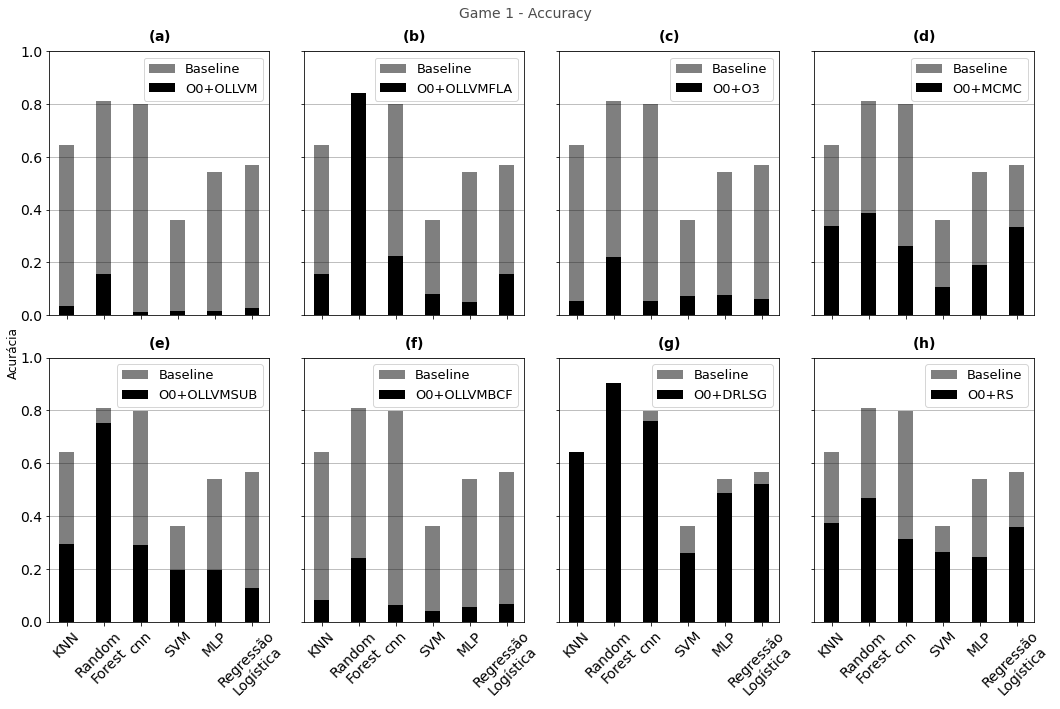

In [30]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(241)
ax1.set_xlabel(r"$\bf(a)$", fontsize=ticksSize, labelpad=10)
ax1.xaxis.set_label_position("top")
gerarGrafico("O0+OLLVM", "Game 1 - Accuracy", figToUse=fig, axisToUse=ax1, save=False)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(242, sharey=ax1)
ax2.set_xlabel(r"$\bf(b)$", fontsize=ticksSize, labelpad=10)
ax2.xaxis.set_label_position("top")
gerarGrafico("O0+OLLVMFLA", "Game 1 - Accuracy", figToUse=fig, axisToUse=ax2, save=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = fig.add_subplot(243, sharey=ax1)
ax3.set_xlabel(r"$\bf(c)$", fontsize=ticksSize, labelpad=10)
ax3.xaxis.set_label_position("top")
gerarGrafico("O0+O3", "Game 1 - Accuracy", figToUse=fig, axisToUse=ax3, save=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

ax4 = fig.add_subplot(244, sharey=ax1)
ax4.set_xlabel(r"$\bf(d)$", fontsize=ticksSize, labelpad=10)
ax4.xaxis.set_label_position("top")
gerarGrafico("O0+MCMC", "Game 1 - Accuracy", figToUse=fig, axisToUse=ax4, save=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

ax5 = fig.add_subplot(245)
ax5.set_xlabel(r"$\bf(e)$", fontsize=ticksSize, labelpad=10)
ax5.xaxis.set_label_position("top")
gerarGrafico("O0+OLLVMSUB", "Game 1 - Accuracy", figToUse=fig, axisToUse=ax5, save=False)

ax6 = fig.add_subplot(246, sharey=ax5)
ax6.set_xlabel(r"$\bf(f)$", fontsize=ticksSize, labelpad=10)
ax6.xaxis.set_label_position("top")
gerarGrafico("O0+OLLVMBCF", "Game 1 - Accuracy", figToUse=fig, axisToUse=ax6, save=False)
plt.setp(ax6.get_yticklabels(), visible=False)

ax7 = fig.add_subplot(247, sharey=ax5)
ax7.set_xlabel(r"$\bf(g)$", fontsize=ticksSize, labelpad=10)
ax7.xaxis.set_label_position("top")
gerarGrafico("O0+DRLSG", "Game 1 - Accuracy", figToUse=fig, axisToUse=ax7, save=False)
plt.setp(ax7.get_yticklabels(), visible=False)

ax8 = fig.add_subplot(248, sharey=ax5)
ax8.set_xlabel(r"$\bf(h)$", fontsize=ticksSize, labelpad=10)
ax8.xaxis.set_label_position("top")
gerarGrafico("O0+RS", "Game 1 - Accuracy", figToUse=fig, axisToUse=ax8, save=False)
plt.setp(ax8.get_yticklabels(), visible=False)

base="ojclone"
tipo="jogo1"
fig.tight_layout()
fig.savefig(f"pdfs/{base}_{tipo}.pdf", format="pdf", transparent=False)

#### Game 2

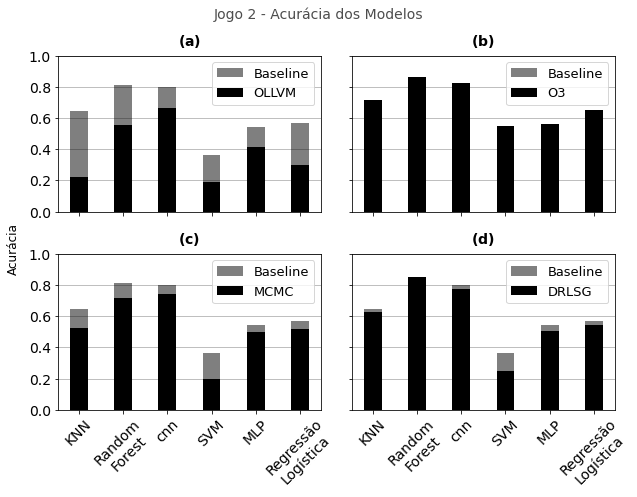

In [29]:
fig = plt.figure(figsize=figSize)
ax1 = fig.add_subplot(221)
ax1.set_xlabel(r"$\bf(a)$", fontsize=ticksSize, labelpad=10)
ax1.xaxis.set_label_position("top")
gerarGrafico("OLLVM", "Jogo 2 - Acurácia dos Modelos", figToUse=fig, axisToUse=ax1, save=False)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(222, sharey=ax1)
ax2.set_xlabel(r"$\bf(b)$", fontsize=ticksSize, labelpad=10)
ax2.xaxis.set_label_position("top")
gerarGrafico("O3", "Jogo 2 - Acurácia dos Modelos", figToUse=fig, axisToUse=ax2, save=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = fig.add_subplot(223)
ax3.set_xlabel(r"$\bf(c)$", fontsize=ticksSize, labelpad=10)
ax3.xaxis.set_label_position("top")
gerarGrafico("MCMC", "Jogo 2 - Acurácia dos Modelos", figToUse=fig, axisToUse=ax3, save=False)

ax4 = fig.add_subplot(224, sharey=ax3)
ax4.set_xlabel(r"$\bf(d)$", fontsize=ticksSize, labelpad=10)
ax4.xaxis.set_label_position("top")
gerarGrafico("DRLSG", "Jogo 2 - Acurácia dos Modelos", figToUse=fig, axisToUse=ax4, save=False)
plt.setp(ax4.get_yticklabels(), visible=False)

base="ojclone"
tipo="jogo2"
fig.tight_layout()
fig.savefig(f"pdfs/{base}_{tipo}.pdf", format="pdf", transparent=False)

#### Game 3

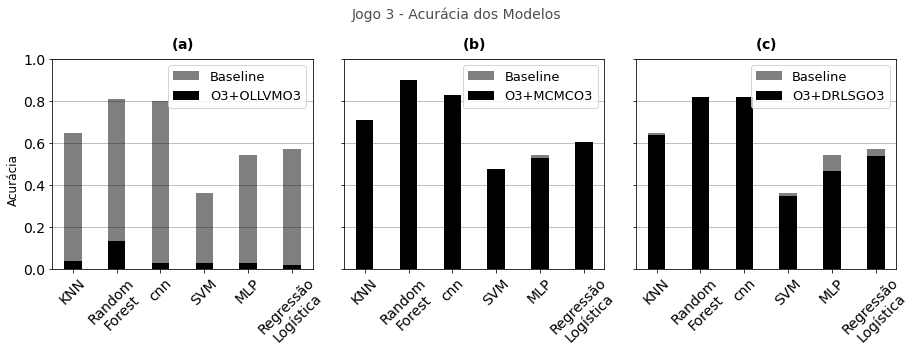

In [33]:
fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(131)
ax1.set_xlabel(r"$\bf(a)$", fontsize=ticksSize, labelpad=10)
ax1.xaxis.set_label_position("top")
gerarGrafico("O3+OLLVMO3", "Jogo 3 - Acurácia dos Modelos", figToUse=fig, axisToUse=ax1, save=False)

ax2 = fig.add_subplot(132, sharey=ax1)
ax2.set_xlabel(r"$\bf(b)$", fontsize=ticksSize, labelpad=10)
ax2.xaxis.set_label_position("top")
gerarGrafico("O3+MCMCO3", "Jogo 3 - Acurácia dos Modelos", figToUse=fig, axisToUse=ax2, save=False)
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = fig.add_subplot(133, sharey=ax1)
ax3.set_xlabel(r"$\bf(c)$", fontsize=ticksSize, labelpad=10)
ax3.xaxis.set_label_position("top")
gerarGrafico("O3+DRLSGO3", "Jogo 3 - Acurácia dos Modelos", figToUse=fig, axisToUse=ax3, save=False)
plt.setp(ax3.get_yticklabels(), visible=False)

base="ojclone"
tipo="jogo3"
fig.tight_layout()
fig.savefig(f"pdfs/{base}_{tipo}.pdf", format="pdf", transparent=False)

#### Extra

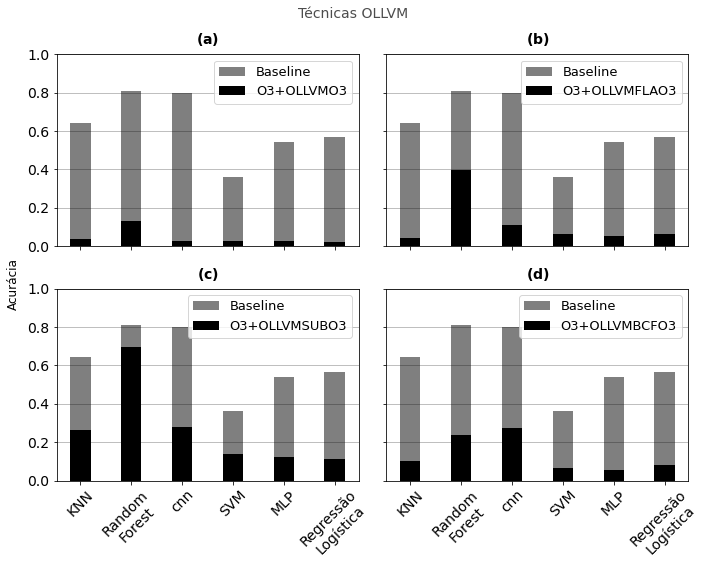

In [36]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(221)
ax1.set_xlabel(r"$\bf(a)$", fontsize=ticksSize, labelpad=10)
ax1.xaxis.set_label_position("top")
gerarGrafico("O3+OLLVMO3", "Técnicas OLLVM", figToUse=fig, axisToUse=ax1, save=False)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(222, sharey=ax1)
ax2.set_xlabel(r"$\bf(b)$", fontsize=ticksSize, labelpad=10)
ax2.xaxis.set_label_position("top")
gerarGrafico("O3+OLLVMFLAO3", "Técnicas OLLVM", figToUse=fig, axisToUse=ax2, save=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = fig.add_subplot(223)
ax3.set_xlabel(r"$\bf(c)$", fontsize=ticksSize, labelpad=10)
ax3.xaxis.set_label_position("top")
gerarGrafico("O3+OLLVMSUBO3", "Técnicas OLLVM", figToUse=fig, axisToUse=ax3, save=False)

ax4 = fig.add_subplot(224, sharey=ax3)
ax4.set_xlabel(r"$\bf(d)$", fontsize=ticksSize, labelpad=10)
ax4.xaxis.set_label_position("top")
gerarGrafico("O3+OLLVMBCFO3", "Técnicas OLLVM", figToUse=fig, axisToUse=ax4, save=False)
plt.setp(ax4.get_yticklabels(), visible=False)

base="ojclone"
tipo="ollvm"
fig.tight_layout()
fig.savefig(f"pdfs/{base}_{tipo}.pdf", format="pdf", transparent=False)

#### Datasets

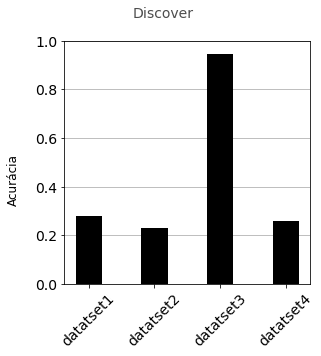

In [48]:
fig = gerarGrafico("cnn", "Discover", True)